In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [2]:
data = pd.read_csv(r"D:\Meghana\DSBA\Projects\Olympics\Dataset\athletes.csv")
regions = pd.read_csv(r"D:\Meghana\DSBA\Projects\Olympics\Dataset\noc_regions.csv")

In [3]:
data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [80]:
data.shape


(271116, 15)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df = pd.merge(data, regions, on='NOC', how='left')

In [9]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
df = df.drop('ID', axis=1)
df = df.drop('notes', axis=1)

In [11]:
df.duplicated().sum()


1385

In [7]:
df.drop_duplicates(inplace=True)

In [91]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
dtype: int64

In [8]:
df['Medal'].fillna(value="No Medal",inplace=True)
df['region'].fillna(value="Region Unknown",inplace=True)
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df['Height'].fillna(value=df['Height'].mean(),inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(),inplace=True)

In [97]:
summer.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [98]:
df.tail()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,Poland
271112,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,Poland
271113,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,Poland
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,Poland
271115,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,No Medal,Poland


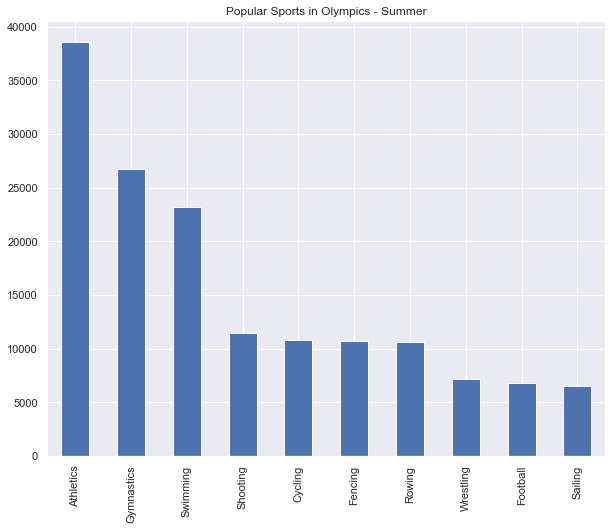

In [96]:
plt.figure(figsize=(10, 8))
tops=df[df['Season']=='Summer'].Sport.value_counts().head(n=10)
tops.plot(kind='bar')
plt.title('Popular Sports in Olympics - Summer')
plt.show()

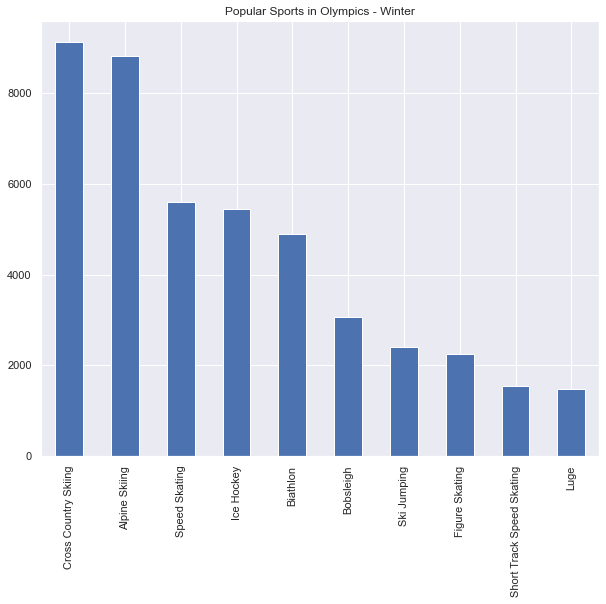

In [99]:
plt.figure(figsize=(10, 8))
tops=df[df['Season']=='Winter'].Sport.value_counts().head(n=10)
tops.plot(kind='bar')
plt.title('Popular Sports in Olympics - Winter')
plt.show()

In [11]:
df['Season'].value_counts()

Summer    221167
Winter     48564
Name: Season, dtype: int64

In [13]:
summer = df[df['Season']=='Summer']

In [38]:
summer.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [49]:
summer.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands


In [50]:
summer.describe()

,Age,Height,Weight,Year
count,212137.000000,170667.000000,168661.000000,221167.000000
mean,25.549367,175.515560,70.688298,1976.602486
std,6.434035,10.914843,14.805242,30.820855
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1984.000000
75%,28.000000,183.000000,79.000000,2000.000000
max,97.000000,226.000000,214.000000,2016.000000


In [26]:
summer["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Region Unknown', 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Sri Lanka',
       'Armenia', 'Ivory Coast', 

In [44]:
summer['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [45]:
summer['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

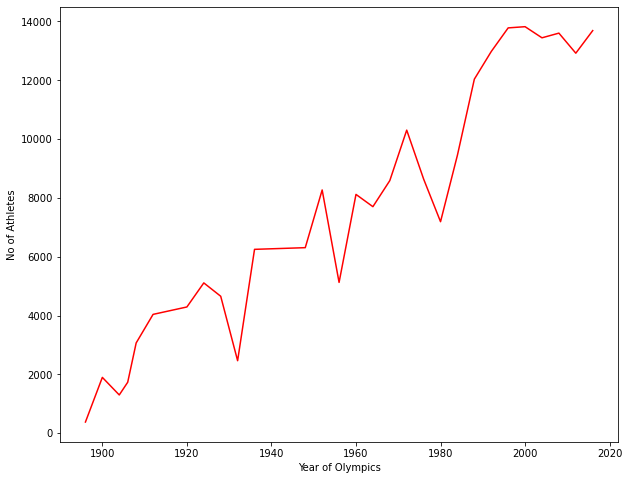

In [19]:
ath=summer.groupby('Year')['Team'].count()
plt.figure(figsize=(10, 8))
ath.plot(kind='line',color='red')
plt.xlabel('Year of Olympics')
plt.ylabel('No of Athletes')
plt.show()

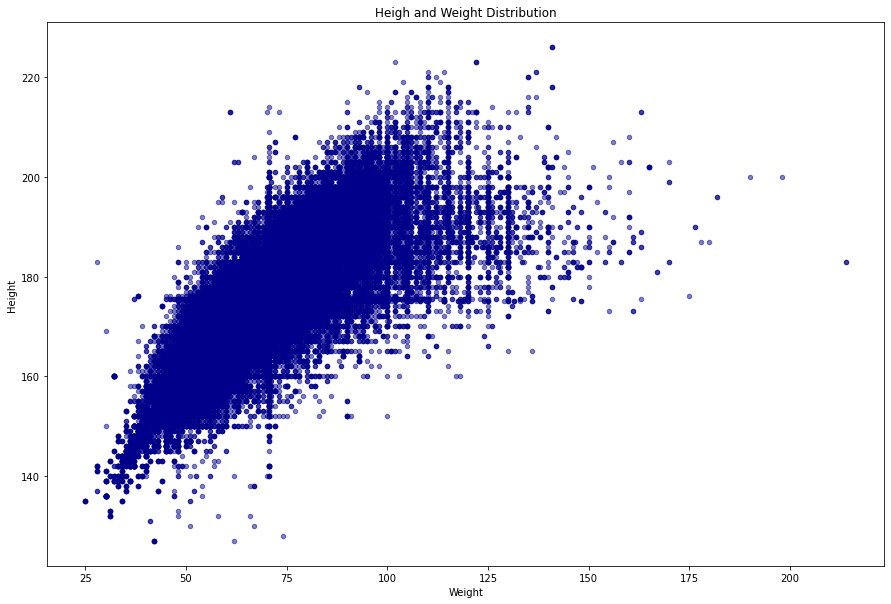

In [45]:
summer.plot(kind='scatter', x='Weight', y='Height', alpha=0.5, color='darkblue', figsize = (10,8))
plt.xlabel='Weight'
plt.ylabel='Height'
plt.title('Heigh and Weight Distribution')

plt.show()

C:\Users\kotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


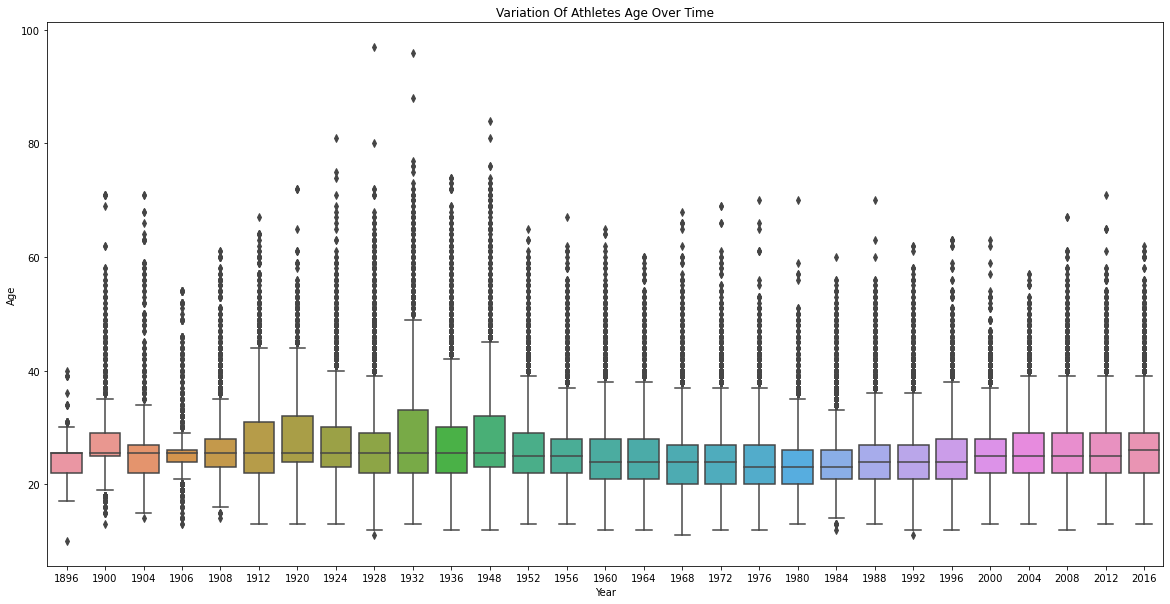

In [31]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=summer)
plt.title('Variation Of Athletes Age Over Time')

C:\Users\kotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Variation Of Athletes Weight Over Time')

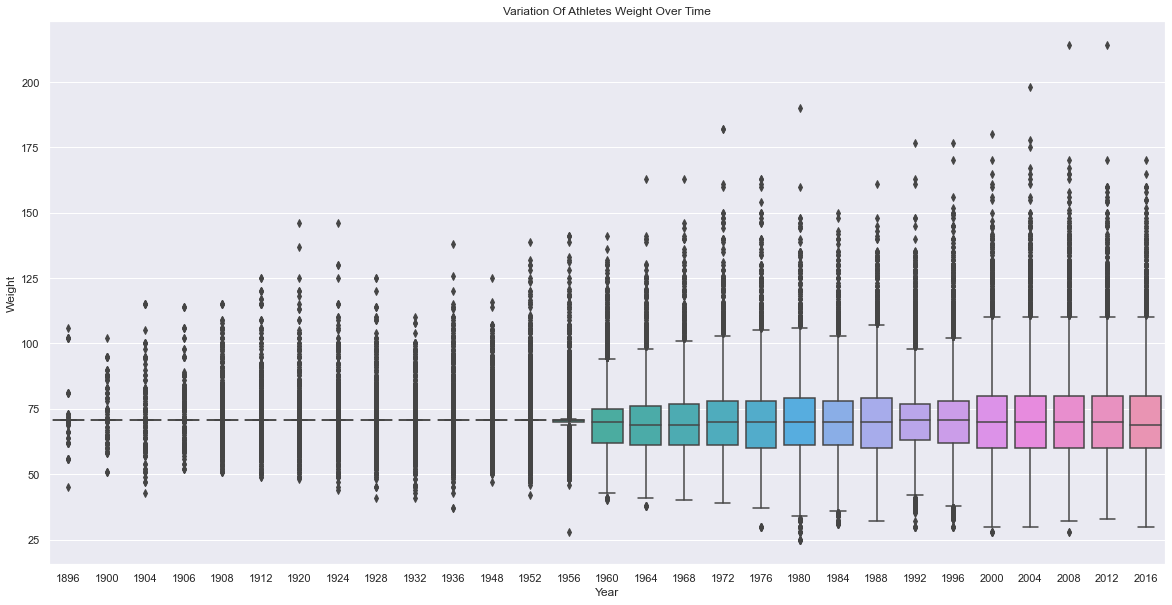

In [102]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Weight', data=summer)
plt.title('Variation Of Athletes Weight Over Time')

C:\Users\kotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



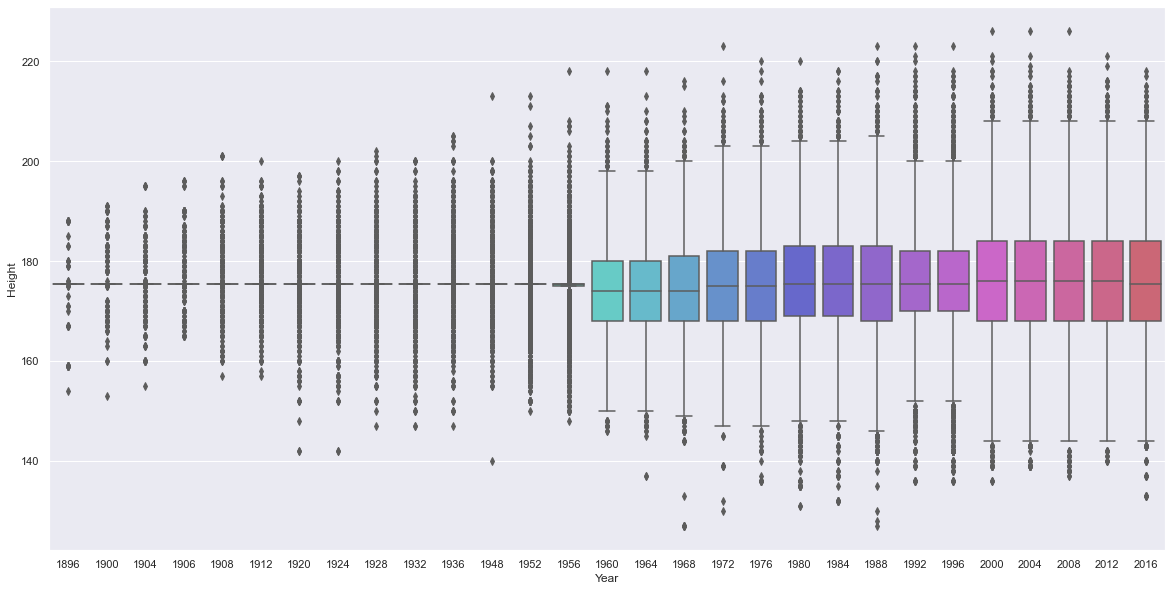

In [79]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Height', data=summer,palette="hls")
plt.show()

In [103]:
female_h = summer[summer['Sex']=='F']['Height'].dropna()
male_h = summer[summer['Sex']=='M']['Height'].dropna()

hist_data = [female_h, male_h]
group_labels = ['Female Hbeight', 'Male Height']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Athlets Height distribution plot')
iplot(fig, filename='dist_only')

In [18]:
female_w = summer[summer['Sex']=='F']['Weight']
male_w = summer[summer['Sex']=='M']['Weight']

hist_data = [female_w, male_w]
group_labels = ['Female Weight', 'Male Weight']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Athlets Weight distribution plot')
iplot(fig, filename='dist_only')

In [15]:
women = summer[(summer.Sex == 'F') ]

In [16]:
women.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands
27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands
32,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland
33,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway


Text(0.5, 1.0, 'Women medals per year')

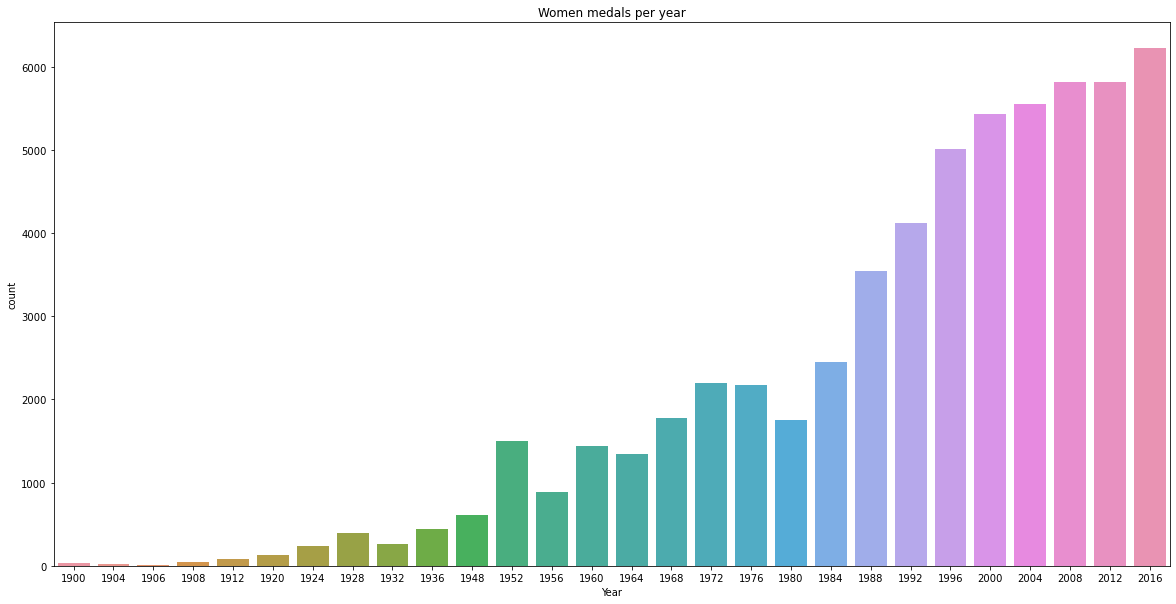

In [18]:

plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women)
plt.title('Women medals per year')

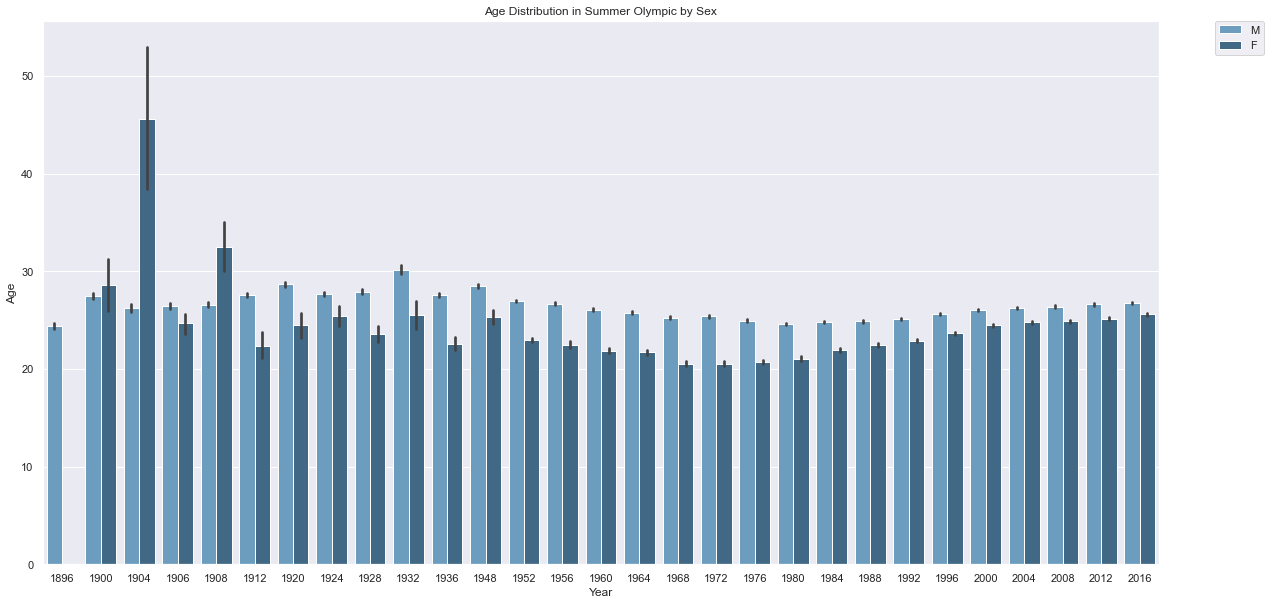

In [110]:
plt.figure(figsize=(20,10))
sns.barplot(x="Year", y="Age", data=summer, hue="Sex",palette="Blues_d")
plt.title('Age Distribution in Summer Olympic by Sex') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [23]:
summer = pd.concat([summer,pd.get_dummies(summer['Medal'])],axis=1)
summer.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,0,0,1,0
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.701778,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,Netherlands,0,0,1,0


In [34]:
#To remove group medals
medaltally = summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medaltally.head() 

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,0,0,1,0
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.701778,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,Netherlands,0,0,1,0


In [36]:
medaltally = medaltally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
medaltally.head()

,NOC,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,URS,394.0,317.0,294.0
2,GBR,278.0,317.0,300.0
3,GER,235.0,261.0,283.0
4,FRA,234.0,256.0,287.0


In [37]:
medaltally[medaltally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9.0,7.0,12.0


In [39]:
medaltally['Total'] = medaltally['Gold'] + medaltally['Silver'] + medaltally['Bronze']

In [40]:
medaltally.head()

,NOC,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,URS,394.0,317.0,294.0,1005.0
2,GBR,278.0,317.0,300.0,895.0
3,GER,235.0,261.0,283.0,779.0
4,FRA,234.0,256.0,287.0,777.0


In [ ]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="Height", y="Weight", hue='Medal', data=allAthletesHW)
plt.title('Height VS Weight of Olympics Athletes', fontsize=20)
plt.show()

In [46]:
gold = summer[(summer.Medal == 'Gold')]
gold.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver
3,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0,0
42,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,0,1,0,0
44,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,0,1,0,0
48,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,0,1,0,0
79,Ragnhild Margrethe Aamodt,F,27.0,163.000000,70.701778,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,0,1,0,0


In [49]:
silver = summer[(summer.Medal == 'Silver')]
silver.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver
86,Alf Lied Aanning,M,24.0,175.338953,70.701778,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,0,0,0,1
92,Pepijn Aardewijn,M,26.0,189.000000,72.000000,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands,0,0,0,1
106,Karl Jan Aas,M,20.0,175.338953,70.701778,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,0,0,0,1
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.000000,80.000000,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,0,0,0,1
175,Luc Abalo,M,31.0,182.000000,86.000000,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France,0,0,0,1


In [50]:
bronze =summer[(summer.Medal == 'Bronze')] 
bronze.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver
37,Arvo Ossian Aaltonen,M,30.0,175.338953,70.701778,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,1,0,0,0
38,Arvo Ossian Aaltonen,M,30.0,175.338953,70.701778,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,1,0,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,1,0,0,0
50,Paavo Johannes Aaltonen,M,32.0,175.000000,64.000000,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,1,0,0,0
91,Willemien Aardenburg,F,22.0,175.338953,70.701778,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,1,0,0,0


In [57]:
athlete = summer.drop_duplicates(subset=['Name','region'])
athlete.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,0,0,1,0
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.701778,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,Netherlands,0,0,1,0


In [60]:

x1 = athlete[athlete['Medal'] == 'Gold']['Age']
x2 = athlete[athlete['Medal'] == 'Silver']['Age']
x3 = athlete[athlete['Medal'] == 'Bronze']['Age']

fig = ff.create_distplot([x1,x2,x3],['Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.update_layout(title='Distribution of Age')
fig.show()

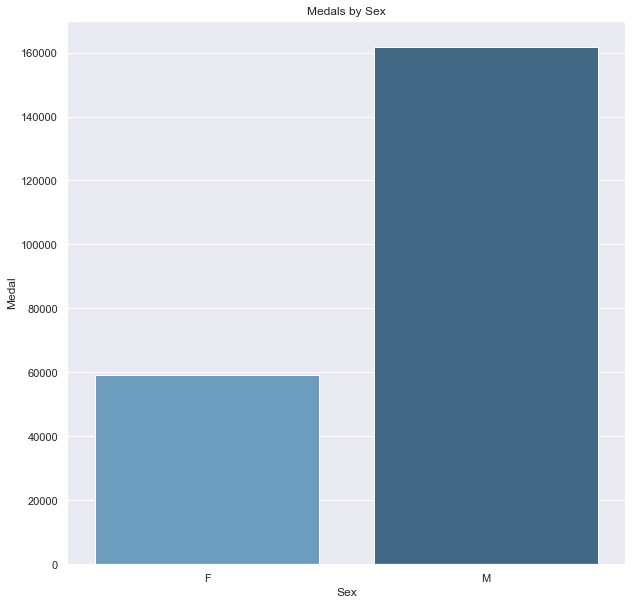

In [112]:
sc=summer.groupby('Sex')['Medal'].count().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(x="Sex", y="Medal",data=sc,palette="Blues_d")
plt.title('Medals by Sex')
plt.show()

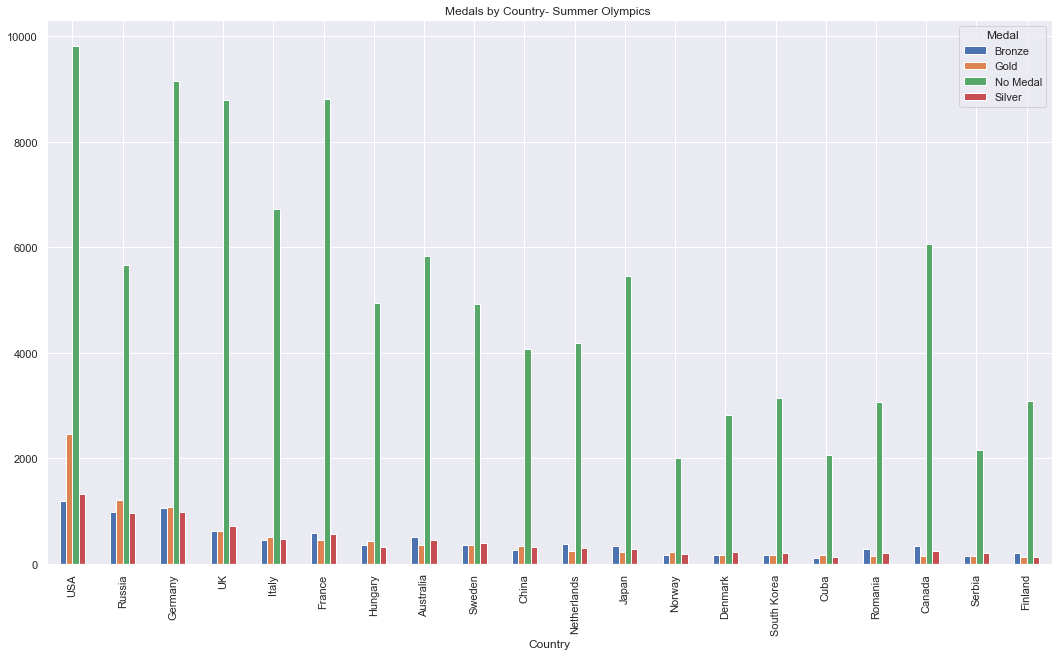

In [80]:
cmedal=summer.groupby(['region','Medal'])['Sex'].count().reset_index()
cmedal=cmedal.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)
cmedal.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country ')
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.show()

In [70]:
summer.groupby('Name')['Medal'].count().nlargest(10).reset_index()

,Name,Medal
0,Heikki Ilmari Savolainen,39
1,"Joseph ""Josy"" Stoffel",38
2,Ioannis Theofilakis,36
3,Takashi Ono,33
4,Alexandros Theofilakis,32
5,Andreas Wecker,32
6,"Alfred August ""Al"" Jochim",31
7,"Johann ""Hans"" Sauter",31
8,Michel Mathiot,31
9,Karl Tore William Thoresson,30


In [71]:
summer.loc[summer.Medal=='Gold'].groupby('Name')['Medal'].count().nlargest(10).reset_index()

,Name,Medal
0,"Michael Fred Phelps, II",23
1,"Raymond Clarence ""Ray"" Ewry",10
2,"Frederick Carlton ""Carl"" Lewis",9
3,Larysa Semenivna Latynina (Diriy-),9
4,Mark Andrew Spitz,9
5,Paavo Johannes Nurmi,9
6,Birgit Fischer-Schmidt,8
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
8,"Matthew Nicholas ""Matt"" Biondi",8
9,Sawao Kato,8


In [72]:
silver.groupby('Name')['Medal'].count().nlargest(10).reset_index()

,Name,Medal
0,Aleksandr Nikolayevich Dityatin,6
1,Mikhail Yakovlevich Voronin,6
2,Shirley Frances Babashoff,6
3,Aleksandr Vladimirovich Popov,5
4,Dagmar Hase,5
5,Edoardo Mangiarotti,5
6,Gustavo Marzi,5
7,Katalin Kovcs,5
8,Larysa Semenivna Latynina (Diriy-),5
9,Leisel Marie Jones,5


In [75]:
bronze.groupby('Name')['Medal'].count().nlargest(10).reset_index()

,Name,Medal
0,Aleksey Yuryevich Nemov,6
1,Franziska van Almsick,6
2,Heikki Ilmari Savolainen,6
3,Merlene Joyce Ottey-Page,6
4,"Adrianus Egbert Willem ""Arie"" de Jong",5
5,Antje Buschschulte (-Meeuw),5
6,Daniel Jean Claude Ernest Revenu,5
7,Natalie Anne Coughlin (-Hall),5
8,"Philip Aron ""Phil"" Edwards",5
9,Christian Nol,4
